# STAGE 3 - Modelling | Banking Dataset #Absolute

Kelompok 7: 

1. Fikrie Lazuardi 
2. Rian Dwi Haryono
3. Retno dwi
4. Wahyuni
5. Hidayat Yatul
6. Yunita Rachmawati
7. Retno Harindhi

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn import over_sampling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import dataset train
import pandas as pd 
dftrain = pd.read_csv('/content/stage2clear.csv.csv')
pd.set_option('display.max_columns', None) #Menunjukan semua kolom
dftrain.sample(5)

,job,marital,education,housing,loan,y,age_norm,balance_std,duration_norm,campaign_std
16846,3,1,3,0,0,0,0.611111,-0.630516,0.299029,0.274437
2280,7,2,1,0,0,0,0.296296,-0.721077,0.105825,-0.750442
25837,4,1,2,0,0,0,0.203704,-0.252076,0.067961,-0.750442
618,1,0,0,1,0,0,0.629630,0.082146,0.140777,-0.750442
19718,4,1,2,0,0,0,0.462963,-0.522561,0.164078,3.861512


In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40211 entries, 0 to 40210
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job            40211 non-null  int64  
 1   marital        40211 non-null  int64  
 2   education      40211 non-null  int64  
 3   housing        40211 non-null  int64  
 4   loan           40211 non-null  int64  
 5   y              40211 non-null  int64  
 6   age_norm       40211 non-null  float64
 7   balance_std    40211 non-null  float64
 8   duration_norm  40211 non-null  float64
 9   campaign_std   40211 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 3.1 MB


# Modelling

## Split Data

In [4]:
# split train dan test 
X = dftrain.drop('y',axis = 1)
Y = dftrain['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred_train = model.predict(X_train) 
    y_pred_test = model.predict(X_test)
    y_proba_train = model.predict_proba(X_train)
    y_proba_test = model.predict_proba(X_test)

    
    print("Accuracy (Train Set): %.2f" % accuracy_score(Y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(Y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(Y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(Y_train, y_pred_train))
    print("ROC_AUC (Train Set): %.2f" % roc_auc_score(Y_train, y_proba_train[:, 1]))

    print('\n')
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(Y_test, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(Y_test, y_pred_test))
    print("Recall (Test Set): %.2f" % recall_score(Y_test, y_pred_test))
    print("F1-Score (Test Set): %.2f" % f1_score(Y_test, y_pred_test))
    print("ROC_AUC (Test Set): %.2f" % roc_auc_score(Y_test, y_proba_test[:, 1]))
    
    print('\n')

    score = cross_validate(model, X, Y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
  
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Modelling and Model Evaluation

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
# import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, Y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Train Set): 0.90
Precision (Train Set): 0.54
Recall (Train Set): 0.17
F1-Score (Train Set): 0.25
ROC_AUC (Train Set): 0.85


Accuracy (Test Set): 0.90
Precision (Test Set): 0.51
Recall (Test Set): 0.15
F1-Score (Test Set): 0.23
ROC_AUC (Test Set): 0.84


roc_auc (crossval train): 0.8446474582246749
roc_auc (crossval test): 0.8149616085939659


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, Y_train)
eval_classification(rs)

Accuracy (Train Set): 0.90
Precision (Train Set): 0.53
Recall (Train Set): 0.12
F1-Score (Train Set): 0.19
ROC_AUC (Train Set): 0.85


Accuracy (Test Set): 0.90
Precision (Test Set): 0.56
Recall (Test Set): 0.10
F1-Score (Test Set): 0.18
ROC_AUC (Test Set): 0.84


roc_auc (crossval train): 0.843452318238518
roc_auc (crossval test): 0.8111476739758597


### KNearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, Y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Train Set): 0.92
Precision (Train Set): 0.73
Recall (Train Set): 0.28
F1-Score (Train Set): 0.41
ROC_AUC (Train Set): 0.93


Accuracy (Test Set): 0.89
Precision (Test Set): 0.41
Recall (Test Set): 0.12
F1-Score (Test Set): 0.19
ROC_AUC (Test Set): 0.71


roc_auc (crossval train): 0.9353287096377458
roc_auc (crossval test): 0.6910647396191172


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30)) # jumlah tetangga yg di check 
weight =['uniform', 'distance']
p=[1,2] # 1 manhattan 
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] # cara menghitung tertangga terdekatnya
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, Y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, Y_train)
eval_classification(rs)

Accuracy (Train Set): 0.90
Precision (Train Set): 0.71
Recall (Train Set): 0.03
F1-Score (Train Set): 0.05
ROC_AUC (Train Set): 0.86


Accuracy (Test Set): 0.90
Precision (Test Set): 0.68
Recall (Test Set): 0.02
F1-Score (Test Set): 0.04
ROC_AUC (Test Set): 0.77


roc_auc (crossval train): 0.8580023432772327
roc_auc (crossval test): 0.7372182103613026


### Decission Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, Y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
ROC_AUC (Train Set): 1.00


Accuracy (Test Set): 0.86
Precision (Test Set): 0.29
Recall (Test Set): 0.31
F1-Score (Test Set): 0.30
ROC_AUC (Test Set): 0.61


roc_auc (crossval train): 0.9999999968019082
roc_auc (crossval test): 0.6002250268257087


In [11]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
model.fit(X_train, Y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Train Set): 0.90
Precision (Train Set): 0.55
Recall (Train Set): 0.15
F1-Score (Train Set): 0.23
ROC_AUC (Train Set): 0.88


Accuracy (Test Set): 0.90
Precision (Test Set): 0.48
Recall (Test Set): 0.14
F1-Score (Test Set): 0.21
ROC_AUC (Test Set): 0.83


roc_auc (crossval train): 0.8740144941368326
roc_auc (crossval test): 0.7925720435087833


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
ROC_AUC (Train Set): 1.00


Accuracy (Test Set): 0.90
Precision (Test Set): 0.51
Recall (Test Set): 0.21
F1-Score (Test Set): 0.29
ROC_AUC (Test Set): 0.85


roc_auc (crossval train): 0.999999981877578
roc_auc (crossval test): 0.8188640214254393


In [ ]:
from imblearn import over_sampling
X_train_over, Y_train_over = over_sampling.SMOTE(0.5).fit_resample(X_train, Y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_over, Y_train_over)
eval_classification(rf)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
ROC_AUC (Train Set): 1.00


Accuracy (Test Set): 0.87
Precision (Test Set): 0.39
Recall (Test Set): 0.47
F1-Score (Test Set): 0.43
ROC_AUC (Test Set): 0.84


roc_auc (crossval train): 0.999999981877578
roc_auc (crossval test): 0.8188640214254393


In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train_over, Y_train_over)
eval_classification(rs)

Accuracy (Train Set): 0.93
Precision (Train Set): 0.61
Recall (Train Set): 0.78
F1-Score (Train Set): 0.69
ROC_AUC (Train Set): 0.96


Accuracy (Test Set): 0.86
Precision (Test Set): 0.38
Recall (Test Set): 0.55
F1-Score (Test Set): 0.45
ROC_AUC (Test Set): 0.85


roc_auc (crossval train): 0.9438224611877203
roc_auc (crossval test): 0.8300502211985842


### ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train_over, Y_train_over)
eval_classification(clf)

Accuracy (Train Set): 0.86
Precision (Train Set): 0.37
Recall (Train Set): 0.59
F1-Score (Train Set): 0.45
ROC_AUC (Train Set): 0.85


Accuracy (Test Set): 0.86
Precision (Test Set): 0.36
Recall (Test Set): 0.55
F1-Score (Test Set): 0.44
ROC_AUC (Test Set): 0.84


roc_auc (crossval train): 0.8682484521864945
roc_auc (crossval test): 0.8276316482155099


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
ab_tuned.fit(X_train,Y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Train Set): 0.90
Precision (Train Set): 0.55
Recall (Train Set): 0.19
F1-Score (Train Set): 0.28
ROC_AUC (Train Set): 0.87


Accuracy (Test Set): 0.90
Precision (Test Set): 0.55
Recall (Test Set): 0.18
F1-Score (Test Set): 0.27
ROC_AUC (Test Set): 0.86


roc_auc (crossval train): 0.8714655256671084
roc_auc (crossval test): 0.8336444848159846


### XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_over, Y_train_over)
eval_classification(xg)

Accuracy (Train Set): 0.86
Precision (Train Set): 0.38
Recall (Train Set): 0.65
F1-Score (Train Set): 0.48
ROC_AUC (Train Set): 0.87


Accuracy (Test Set): 0.85
Precision (Test Set): 0.36
Recall (Test Set): 0.60
F1-Score (Test Set): 0.45
ROC_AUC (Test Set): 0.86


roc_auc (crossval train): 0.8801891764132102
roc_auc (crossval test): 0.8362134185488174


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_train,Y_train)

Accuracy (Train Set): 0.91
Precision (Train Set): 0.70
Recall (Train Set): 0.25
F1-Score (Train Set): 0.37
ROC_AUC (Train Set): 0.91


Accuracy (Test Set): 0.90
Precision (Test Set): 0.56
Recall (Test Set): 0.16
F1-Score (Test Set): 0.25
ROC_AUC (Test Set): 0.86




#### FPR dan TPR XGBoost

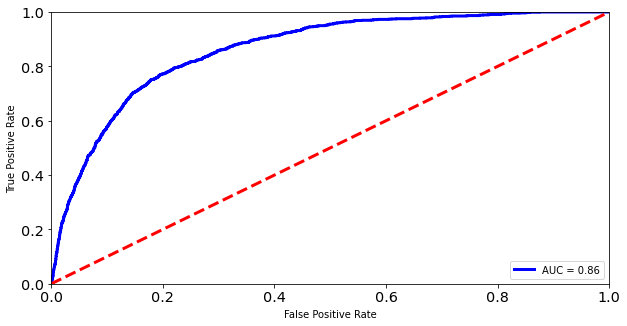

In [ ]:
import matplotlib.pyplot as plt
# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Menampilkan ROC curve
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# Memprediksi kelas pada data uji
y_pred = xgb_model.predict(X_test)

# Menghitung confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)
print(conf_mat)

[[10715   135]
 [ 1034   180]]


## Learning Curve

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, Y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(Y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(Y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param value: 2; train: 0.9981614436689288; test: 0.8508404254511498
param value: 3; train: 0.9896915038259748; test: 0.8539764194990851
param value: 4; train: 0.9803280225868587; test: 0.856644713367092
param value: 5; train: 0.9719757295899314; test: 0.8550754257168671
param value: 7; train: 0.9585141921986736; test: 0.8554356622810679
param value: 8; train: 0.9528368187947776; test: 0.8567997403563645
param value: 9; train: 0.9484158199284616; test: 0.8579223574427379
param value: 11; train: 0.9406091436595231; test: 0.8567538472050349
param value: 12; train: 0.9381199990872647; test: 0.8571390991428725
param value: 13; train: 0.9353307093121817; test: 0.8577012427971665
param value: 14; train: 0.9322742844628524; test: 0.8585841070764278
param value: 16; train: 0.9276884575720017; test: 0.856831246820884
param value: 17; train: 0.9260844853369635; test: 0.8583782142287749
param value: 18; train: 0.9240741232871604; test: 0.8578339495441052
param value: 20; train: 0.9211689536992772;

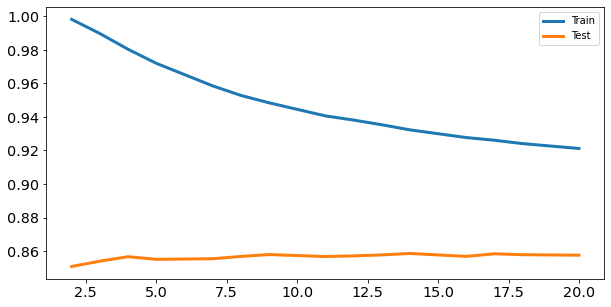

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(X_train, Y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(Y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(Y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

## Feature Importance

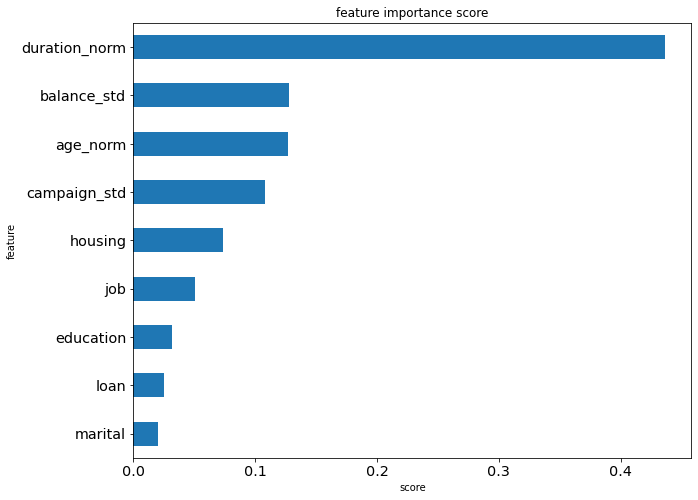

In [ ]:
show_feature_importance(rs.best_estimator_)

## Model

In [7]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

def algorithm_pipeline(X_train_data, X_test_data, Y_train, Y_test, model, hyperparameters, cv=5, scoring_fit='recall'):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train, Y_train)
    best_model = rs.best_estimator_
    
    pred = rs.predict(X_test_data)
    pred_proba = rs.predict(X_test_data)
    score = roc_auc_score(Y_test, pred_proba)
    return [best_model, pred, score]

models_to_train = [LogisticRegression(), 
                   KNeighborsClassifier(), 
                   DecisionTreeClassifier(), 
                   RandomForestClassifier(), 
                   AdaBoostClassifier(random_state=42), 
                   XGBClassifier(random_state=42)
                  ]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.linspace(0.0001, 0.5, 100)]
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,100)),
        'n_neighbors': list(range(1,100)),
        'p': [1,2,3],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_train, X_test, Y_train, Y_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Model: LogisticRegression, Score: 0.5195274030322125
Model: KNeighborsClassifier, Score: 0.5205728862199075
Model: DecisionTreeClassifier, Score: 0.5
Model: RandomForestClassifier, Score: 0.5896215428298119
Model: AdaBoostClassifier, Score: 0.5846965130315293
Model: XGBClassifier, Score: 0.6084951297838581


In [ ]:
models_preds_scores

[[LogisticRegression(C=0.015248484848484848),
  array([0, 0, 0, ..., 0, 0, 0]),
  0.5632393959869114],
 [KNeighborsClassifier(leaf_size=54, n_neighbors=19, p=1),
  array([0, 0, 0, ..., 0, 0, 0]),
  0.5587118031567201],
 [DecisionTreeClassifier(max_depth=19.0, max_features=2,
                         min_samples_leaf=0.30000000000000004,
                         min_samples_split=0.1),
  array([0, 0, 0, ..., 0, 0, 0]),
  0.5],
 [RandomForestClassifier(max_depth=110, max_features='log2', min_samples_split=4,
                         n_estimators=400, n_jobs=-1),
  array([0, 0, 0, ..., 0, 0, 0]),
  0.5923231272633408],
 [AdaBoostClassifier(learning_rate=0.07394736842105264, n_estimators=1700,
                     random_state=42),
  array([0, 0, 0, ..., 1, 0, 0]),
  0.5846965130315293],
 [XGBClassifier(alpha=0.1, colsample_bytree=1.0, eta=0.7777777777777778,
                gamma=0.5, lambda=0.2, max_depth=110, min_child_weight=2,
                random_state=42, tree_method='hist'),
  ar

In [ ]:
# Model: RandomForestClassifier, Score: 0.6317735793790276
# Model: AdaBoostClassifier, Score: 0.6759483011130638
# Model: XGBClassifier, Score: 0.7028687024018746

# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression()))
level1.append(('ab', AdaBoostClassifier()))
level1.append(('xg', XGBClassifier()))

# define level-2 algorithm
level2 = XGBClassifier()

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X_train_over,Y_train_over)
eval_classification(stacking_model)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

vote_model = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(C=4.281332398719396)), 
        ('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)), 
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('ab', AdaBoostClassifier()),
        ('xg', XGBClassifier()),
    ], voting = 'soft')

vote_model.fit(X_train, Y_train)
eval_classification(vote_model)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.50
Recall (Test Set): 0.18
F1-Score (Test Set): 0.26
roc_auc (test-proba): 0.85
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9984023752829414
roc_auc (crossval test): 0.8237157426827988


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

## Shap

In [18]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


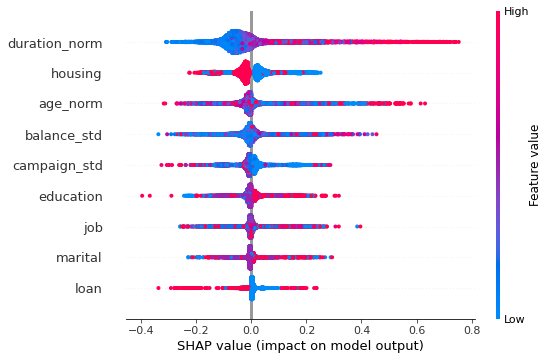

In [19]:
import shap 
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])